In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# RANDOM FOREST

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Заново загружаем данные про Титаник:

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [4]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Fare'], axis = 1)
y = train['Survived']

In [5]:
X = pd.get_dummies(X)

In [6]:
# здесь заполним пропущенные значения возрастов медианным значением:
X['Age'] = X['Age'].fillna(X['Age'].median())

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
clf_rf = RandomForestClassifier()

In [9]:
parameters = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

In [10]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)

In [11]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [12]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [27]:
# Задача:

# Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями 
# и максимальной глубиной равной 5 уровням, поместите её в переменную rf. 
# Обучите модель на данных x_train и y_train, предскажите класс для наблюдений
# в x_test и поместите его в переменную predictions.

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 15, max_depth = 5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
# predictions

# Добираемся до важности переменных:

In [13]:
best_clf = grid_search_cv_clf.best_estimator_

In [14]:
best_clf

RandomForestClassifier(max_depth=5, n_estimators=20)

In [15]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [16]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.2018202 , 0.14234508, 0.04968181, 0.03048255, 0.17901662,
       0.33079887, 0.02923576, 0.00979979, 0.02681933])

In [17]:
feature_importances_df = pd.DataFrame({'features' : list(X_test),
                                      'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
5,Sex_male,0.330799
0,Pclass,0.201820
4,Sex_female,0.179017
1,Age,0.142345
2,SibSp,0.049682
3,Parch,0.030483
6,Embarked_C,0.029236
8,Embarked_S,0.026819
7,Embarked_Q,0.009800


In [ ]:
# Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно.
# С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания.
# Это особенно интересно в науке, где мы пытаемся выявить причинно-следственные связи 
# (хотя, от важности переменных до проверки этих связей ещё длинный путь). 
# Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания,
# но есть одна особенность. При высокой скореллированности нескольких переменных 
# сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан
# случайно. То есть, важность фичей может изменяться в зависимости от выбора из 
# равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между 
# переменными перед обучением, чтобы лучше представлять данные.

In [ ]:
# То есть, всё таки для любой модели лучше избавляться от сильно коррелирующих переменных? (оставлять только одну) Да

In [36]:
# На сколько я помню, рекомендация избавляться от скоррелированных переменных 
# всегда дается с оговоркой о том, что в итоге нужно смотреть на предсказательные 
# способности самой модели. Даже если у некоторых переменных есть линейная зависимость - 
# предсказанные ей результаты могут быть лучше.

# В данном примере с Титаником мы видим sex_male  и sex_female - это вообще по сути 
# одна биномиальная переменная, и тем не менее модель дала хороший результат

# Результат леса со всеми переменными:

# accuracy: 0.820
# precision: 0.838
# recall: 0.692
# f1: 0.758
# ROC AUC: 0.877
# Результат леса без sex_mail:

# accuracy: 0.820
# precision: 0.838
# recall: 0.692
# f1: 0.758
# ROC AUC: 0.884
 

# Видим, что вторая переменная не особо помешала. Думаю, что линейные модели более чувствительны к таким явлениям

# Задача

In [ ]:
# Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. 

# Файл здесь: 
    
# data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')


# Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

# В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз,
# чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
# Чтобы получить такой же график, как в правильном варианте ответа, сделайте

# np.random.seed(0)

# rf = RandomForestClassifier(10, max_depth=5)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [20]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
X = data.drop(['target'], axis = 1)
y = data['target']

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [57]:
clf_rf = RandomForestClassifier()

In [67]:
params = {'n_estimators': [10], 'max_depth': [5]}

In [68]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv = 5)

In [69]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'n_estimators': [10]})

In [70]:
# clf_rf.fit(X_train, y_train)

In [71]:
# predictions = clf_rf.predict(X_test)
# predictions

In [72]:
# Важность переменных

from sklearn.ensemble import RandomForestClassifier

In [73]:
best_clf = grid_search_cv_clf.best_estimator_

In [44]:
best_clf

RandomForestClassifier(max_depth=5, n_estimators=20)

In [74]:
best_clf.score(X_test, y_test)

0.82

In [75]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.09892579, 0.04428798, 0.22014304, 0.05337123, 0.04840182,
       0.00452075, 0.00557325, 0.09172378, 0.02133642, 0.10004482,
       0.04691975, 0.13676387, 0.12798749])

In [88]:
feature_importances_df = pd.DataFrame({'features' : list(X_test),
                                      'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
2,cp,0.220143
11,ca,0.136764
12,thal,0.127987
9,oldpeak,0.100045
0,age,0.098926
7,thalach,0.091724
3,trestbps,0.053371
4,chol,0.048402
10,slope,0.046920
1,sex,0.044288


<Axes: ylabel='features'>

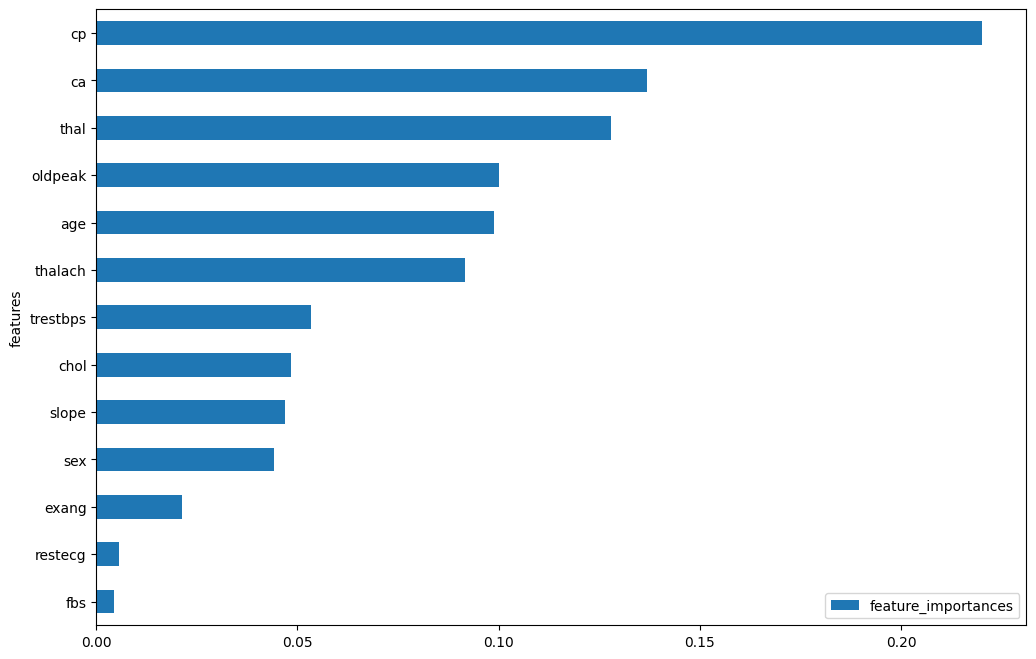

In [92]:
feature_importances_df.set_index('features').sort_values('feature_importances').plot(kind='barh', figsize=(12, 8))


# Задачи

In [ ]:
# Задача №1

# Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. 

# Файл - 'training_mush.csv'


# Передайте в GridSearchCV модель с указанием random_state

# RandomForestClassifier(random_state=0)
# Параметры для выбора -

# n_estimators: от 10 до 50 с шагом 10
# max_depth: от 1 до 12 с шагом 2
# min_samples_leaf: от 1 до 7
# min_samples_split: от 2 до 9 с шагом 2
# Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

# Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [122]:
data = pd.read_csv('training_mush.csv')

In [107]:
data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [125]:
X = data.drop('class', axis = 1)

In [110]:
y = data['class']

In [111]:
clf_rf = RandomForestClassifier()

In [117]:
parameters = {'n_estimators': range(10, 51, 10), 
              'max_depth': range(1, 13, 2), 
              'min_samples_leaf': range(1,8), 
              'min_samples_split': range(2,10,2)
            }

In [118]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, n_jobs = -1, cv = 3)

In [119]:
%time grid_search_cv_clf.fit(X, y)

CPU times: total: 2.66 s
Wall time: 46.7 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [132]:
best_clf_estimator = grid_search_cv_clf.best_estimator_
best_clf_estimator

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [133]:
best_clf_params = grid_search_cv_clf.best_params_

In [134]:
best_clf_params

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [137]:
# Задача №2

# Выберите правильные утверждения о важности фичей для нашего классификатора

In [138]:
best_clf_estimator = grid_search_cv_clf.best_estimator_
best_clf_estimator

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [139]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [141]:
feature_importances_df = pd.DataFrame({'features' : list(X),
                                      'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [ ]:
# # Задача №3

# Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! 

# Предскажите съедобность этих -данных- = грибов и напишите в ответ число несъедобных грибов (класс равен 1).

# Файл - 'testing_mush.csv'

In [143]:
test = pd.read_csv('testing_mush.csv')

In [152]:
predictions = best_clf_estimator.predict(test)
predictions

# или можно не извлекать best_clf_estimator:
    
# predictions = grid_search_cv_clf.predict(test)
# predictions

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [151]:
predictions.sum()

976

In [ ]:
# Задача №4

# Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам,
# (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). 
# Выберите из предложенных вариантов правильный

# Пароль: Cool!Move_forward!
    
# Файл: testing_y_mush.csv.zip

In [158]:
# Read csv files from password-locked zip files


import pandas as pd
import glob
from pathlib import Path
import zipfile

password = b"Cool!Move_forward!"

zipfiles = glob.glob("testing_y_mush.csv.zip") # Get list of zip files
zfs = [zipfile.ZipFile(f) for f in zipfiles]
# Get ZipFile object and csv file name for each zip file 
dfs = [
    pd.read_csv(
        zf.open(zf.infolist()[0], mode='r', pwd=password),
        header=None, sep="\t"
    ) for zf in zfs
]
# Unzip zip file with password, read csv files
review_data = pd.concat(dfs, ignore_index=True)

In [161]:
review_data

,0
0,class
1,0
2,0
3,1
4,1
...,...
2027,1
2028,0
2029,1
2030,0


In [163]:
review_data = review_data.drop(0)

In [169]:
review_data.columns = ['class']

In [170]:
review_data

,class
1,0
2,0
3,1
4,1
5,1
...,...
2027,1
2028,0
2029,1
2030,0


In [174]:
review_data['predictions'] = predictions.astype('int64')

In [177]:
review_data['class'] = review_data['class'].astype('int64')

In [178]:
review_data

,class,predictions
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
...,...,...
2027,1,1
2028,0,0
2029,1,1
2030,0,0


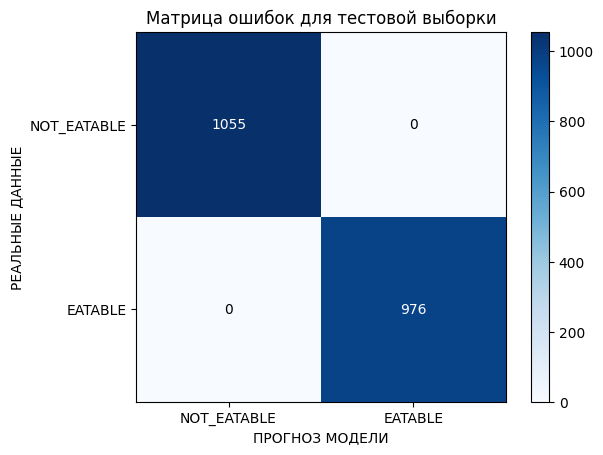

In [181]:
# Матрица ошибок для review_data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(review_data['class'], review_data['predictions']).ravel()

# Создание матрицы ошибок
confusion_matrix = np.array([[tn, fp], [fn, tp]])

# Настройка осей
classes = ['NOT_EATABLE', 'EATABLE']
# classes = ['Negative', 'Positive']


ticks = np.arange(len(classes))

# Создание графика
plt.imshow(confusion_matrix, cmap='Blues')

# Добавление текста к ячейкам
thresh = confusion_matrix.max() / 2
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
        
        
        
# Настройка осей и заголовка
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

# plt.xlabel('y_prediction')
# plt.ylabel('y_True')


plt.xlabel('ПРОГНОЗ МОДЕЛИ')
plt.ylabel('РЕАЛЬНЫЕ ДАННЫЕ')
plt.title('Матрица ошибок для тестовой выборки')

# Отображение цветовой шкалы
plt.colorbar()